In [48]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

import pandas as pd
import numpy as np
import timeit 
import os

#NB : timeit.default_timer() auto chooses timeing function for os, nicer than time.time() or time.clock()
print ("libraries imported")

libraries imported


In [2]:
start_time = timeit.default_timer()
df1 = pd.read_csv('PD1.csv')
elapsed = timeit.default_timer() - start_time
print ("elapsed time : ", elapsed)


elapsed time :  3.178294955276655


In [3]:
start_time = timeit.default_timer()
df2 = pd.read_csv('PD2.csv')
elapsed = timeit.default_timer() - start_time
print ("elapsed time : ", elapsed)

elapsed time :  3.1230059747822176


In [4]:
#answer for Q1a : How many rows and columns are in the data?
print ("Q1a : There are ", df1.shape[0], " rows and ", df1.shape[1], " columns in PD1.csv.")
#answer for Q1a : How many rows and columns are in the data?
print ("NB: There are ", df2.shape[0], " rows and ", df2.shape[1], " columns in PD2.csv.")

Q1a : There are  60000  rows and  397  columns in PD1.csv.
NB: There are  60000  rows and  397  columns in PD2.csv.


In [7]:
#quick examination of dastaframes.
#df1.head()

In [8]:
#quick examination of dastaframe content.
#df2.head()

In [9]:
#quick examination of column names.
df1Names = list(df1)
df2Names = list(df2)

#print (df1Names)
#print (df2Names)

In [10]:
#check overlap of column names.
set.intersection(set(df1Names), set(df2Names))
#we see there is only one common column name.

{'TimeStamp'}

In [11]:
#check overlap of TimeStamp before combining datasets.
#extract TimeStamps
df1TimeStamps = df1['TimeStamp']
print (df1TimeStamps.shape)
df2TimeStamps = df2['TimeStamp']
print (df2TimeStamps.shape)

(60000,)
(60000,)


In [12]:
#comparisons: verbosity here not essential.
df1TimeStampsSet = set(df1TimeStamps)
df2TimeStampsSet = set(df2TimeStamps)
#
print ("are all timestampes from df2 in df1 : ", df1TimeStampsSet.issubset(df2TimeStampsSet))
print ("are all timestampes from df1 in df2 : ", df2TimeStampsSet.issubset(df1TimeStampsSet))
print ("Number of timestamps in df1 not in df2 : ", len(df1TimeStampsSet.difference(df2TimeStampsSet)) )
print ("Number of timestamps in df2 not in df1 : ", len(df2TimeStampsSet.difference(df1TimeStampsSet)) )


are all timestampes from df2 in df1 :  True
are all timestampes from df1 in df2 :  True
Number of timestamps in df1 not in df2 :  0
Number of timestamps in df2 not in df1 :  0


In [13]:
#join two DataFrames on column 'TimeStamp'
#NB: column 'TimeStamp' becomes index, 2*397=794, 2*396=392
df = df1.set_index('TimeStamp').join(df2.set_index('TimeStamp'))
print ("df.shape :", df.shape)
dfColNames = list(df)

df.shape : (60000, 792)


In [14]:
#quick visual review of results for reference.
#df.head()

c. Sensor PrcTotals/321-WQ-024.V should only contain numerical values but also has read errors. Fix the read errors by replacing them with a numeric placeholder for missing values. Fix the read errors in the rest of the sensors/columns using that placeholder.

In [15]:
temp = df['PrcTotals/321-WQ-024.V']
temp.shape

(60000,)

In [16]:
temp.head(5)

TimeStamp
2013-01-02 10:11:30    20217.62
2013-01-02 11:19:30    20217.62
2013-01-02 12:53:00    20217.62
2013-01-02 13:08:30    20217.62
2013-01-02 13:34:00    20217.62
Name: PrcTotals/321-WQ-024.V, dtype: float64

In [17]:
temp.describe()

count    60000.000000
mean     21204.288637
std        614.211027
min      20217.620000
25%      20707.690000
50%      21279.095000
75%      21801.260000
max      22215.140000
Name: PrcTotals/321-WQ-024.V, dtype: float64

In [18]:
print ("# of nulls : ", temp.isnull().sum())
print ("Are there any nulls :",temp.isnull().any() )
print ("Most popular value:", temp.mode())
print ("Number of Non NAN values", df['PrcTotals/321-WQ-024.V'].count())

# of nulls :  0
Are there any nulls : False
Most popular value: 0    21801.39
dtype: float64
Number of Non NAN values 60000


<IPython.core.display.Javascript object>


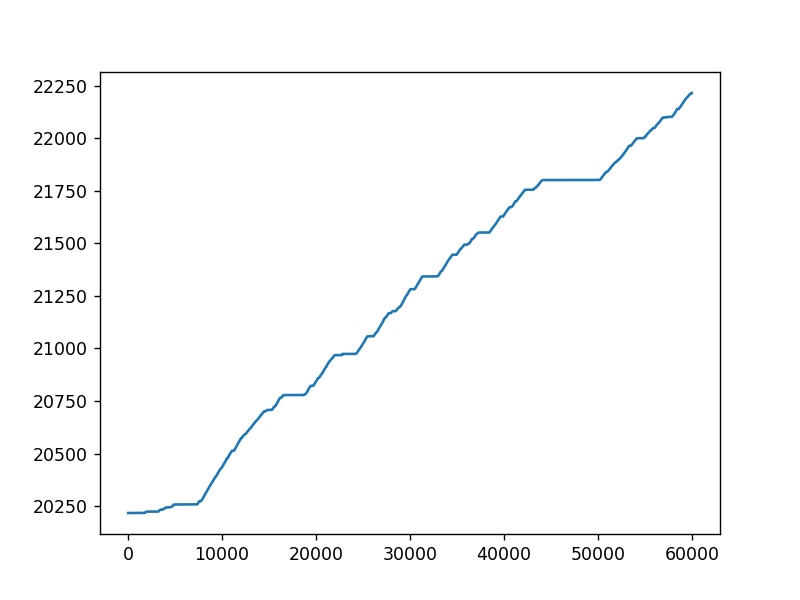

In [19]:
plt.figure()
plt.plot(list(df['PrcTotals/321-WQ-024.V']))


graph and data analysis above shows zero NAN values for column 'PrcTotals/321-WQ-024.V'.
The graph shows values following a general trend, no obvious out of range or read errors.
y stuck @ constant value of 21,800 @ for x=44,000 to 50,000 noted.

d. For 346TT035/PV.V, what values of sensor readings represent the 10th, 50th and 90th percentiles?

In [20]:
print ("10th percentile ", "{:.2f}".format(df['346TT035/PV.V'].quantile(q=0.1)) )
print ("50th percentile ", "{:.2f}".format(df['346TT035/PV.V'].quantile(q=0.5)) )
print ("90th percentile ", "{:.2f}".format(df['346TT035/PV.V'].quantile(q=0.9)) )

10th percentile  30.45
50th percentile  65.58
90th percentile  70.24


e. Sensor 346TT035/PV.V, contains outliers. Identify these invalid values and replace them with the placeholder for missing values.

In [21]:
df['346TT035/PV.V'].describe()
#NB: std deviation is abnormally large. mean value is large compared to 50 percentile - evidence of outliers distorting stats.

count    58456.000000
mean       637.225591
std       5989.954199
min       -194.845200
25%         57.013642
50%         65.583535
75%         68.514520
max      78330.470000
Name: 346TT035/PV.V, dtype: float64

In [22]:
#check for NAN values
print ("Number of Non NAN values", df['346TT035/PV.V'].count())
print ("Number of NAN values", df.shape[0]-df['346TT035/PV.V'].count())


Number of Non NAN values 58456
Number of NAN values 1544


In [26]:
#large number of NAN values. create new DF with NaN values replaced by mean value and re-assess.
tempMean = df['346TT035/PV.V'].mean()
print ("mean of df['346TT035/PV.V'] = ", tempMean)
df['346TT035/PV.V'] = df['346TT035/PV.V'].fillna(tempMean)
print ("Number of NAN values", df.shape[0]-df['346TT035/PV.V'].count())
print (df['346TT035/PV.V'].describe() )
# std deviation is still excessively large compared to mean, 25/50/75 percentiles.
# obviously a major data cleanup is required.

mean of df['346TT035/PV.V'] =  637.2255908504151
Number of NAN values 0
count    60000.000000
mean       637.225591
std       5912.379848
min       -194.845200
25%         57.603936
50%         65.798315
75%         68.704650
max      78330.470000
Name: 346TT035/PV.V, dtype: float64


In [28]:
print ("df['346TT035/PV.V'].std() = ", df['346TT035/PV.V'].std())
tempMedian = df['346TT035/PV.V'].median()
print ("df['346TT035/PV.V'].median() = ", tempMedian)
print ("10th percentile = ", df['346TT035/PV.V'].quantile(q=0.1))
print ("20th percentile = ", df['346TT035/PV.V'].quantile(q=0.2))
print ("30th percentile = ", df['346TT035/PV.V'].quantile(q=0.3))
print ("40th percentile = ", df['346TT035/PV.V'].quantile(q=0.4))
print ("50th percentile = ", df['346TT035/PV.V'].quantile(q=0.5))
print ("60th percentile = ", df['346TT035/PV.V'].quantile(q=0.6))
print ("70th percentile = ", df['346TT035/PV.V'].quantile(q=0.7))
print ("80th percentile = ", df['346TT035/PV.V'].quantile(q=0.8))
print ("90th percentile = ", df['346TT035/PV.V'].quantile(q=0.9))
print ("95th percentile = ", df['346TT035/PV.V'].quantile(q=0.95))
print ("96th percentile = ", df['346TT035/PV.V'].quantile(q=0.96))
print ("96.2th percentile = ", df['346TT035/PV.V'].quantile(q=0.962))
print ("96.3th percentile = ", df['346TT035/PV.V'].quantile(q=0.963))
print ("96.4th percentile = ", df['346TT035/PV.V'].quantile(q=0.964))
print ("96.425th percentile = ", df['346TT035/PV.V'].quantile(q=0.96425))
print ("96.43th percentile = ", df['346TT035/PV.V'].quantile(q=0.9643))
print ("96.44th percentile = ", df['346TT035/PV.V'].quantile(q=0.9644))
print ("96.45th percentile = ", df['346TT035/PV.V'].quantile(q=0.9645))
print ("96.46th percentile = ", df['346TT035/PV.V'].quantile(q=0.9646))
print ("96.6th percentile = ", df['346TT035/PV.V'].quantile(q=0.966))
print ("97th percentile = ", df['346TT035/PV.V'].quantile(q=0.97))
print ("99th percentile = ", df['346TT035/PV.V'].quantile(q=0.99))
#choose cutoff point for now. todo: revise methods to improve cutoff criteria. zscore? other methods?
cutoff = df['346TT035/PV.V'].quantile(q=0.964)
print ("cutoff:", cutoff)

df['346TT035/PV.V'].std() =  5912.379848156859
df['346TT035/PV.V'].median() =  65.798315
10th percentile =  30.912907000000004
20th percentile =  50.821048000000005
30th percentile =  60.56331900000001
40th percentile =  63.834165999999996
50th percentile =  65.798315
60th percentile =  67.11874
70th percentile =  68.20550499999999
80th percentile =  69.23208618168
90th percentile =  70.65096333472
95th percentile =  72.201257
96th percentile =  77.10806199999999
96.2th percentile =  80.48732856000002
96.3th percentile =  84.52938304999995
96.4th percentile =  95.1301104
96.425th percentile =  127.81272935000622
96.43th percentile =  135.91552498000317
96.44th percentile =  216.48870855995452
96.45th percentile =  367.86120024978595
96.46th percentile =  637.2255908504038
96.6th percentile =  637.2255908504038
97th percentile =  637.2255908504038
99th percentile =  637.2255908504038
cutoff: 95.1301104


In [33]:
#copy df using cutoff @ nominated cutoff point.

#create temp dataframe, trim values >= cutoff point
tempxx = df['346TT035/PV.V'][df['346TT035/PV.V']<cutoff]
# trim values < zero
tempxx = tempxx[tempxx>= 0]

#calculate mean for reduced dataframe
tempxxMean = tempxx.mean()
print ("tempxxMean:", tempxxMean)
print (tempxx.describe())

#now std deviation is much smaller, data is cleaner.

tempxxMean: 58.787207146015525
count    60000.000000
mean        58.787207
std         14.897705
min          0.112798
25%         57.633540
50%         65.171650
75%         68.341972
max         95.127900
Name: 346TT035/PV.V, dtype: float64


In [36]:
#now clean up the original df using the knowledge gained from using the cutoff value.
#replace points outside the cutoff point with new mean from reduced dataframe.
df.loc[df['346TT035/PV.V'] > cutoff, '346TT035/PV.V'] = tempxxMean
#replace values below zero with new mean.
df.loc[df['346TT035/PV.V'] <= 0.0, '346TT035/PV.V'] = tempxxMean

#calc new mean, median etc and compare with prev results.df.ix[df.my_channel > 20000, 'my_channel'] = 0
print ("--------------------")
print (df['346TT035/PV.V'].describe())


--------------------
count    60000.000000
mean        58.787207
std         14.897705
min          0.112798
25%         57.633540
50%         65.171650
75%         68.341972
max         95.127900
Name: 346TT035/PV.V, dtype: float64


<IPython.core.display.Javascript object>


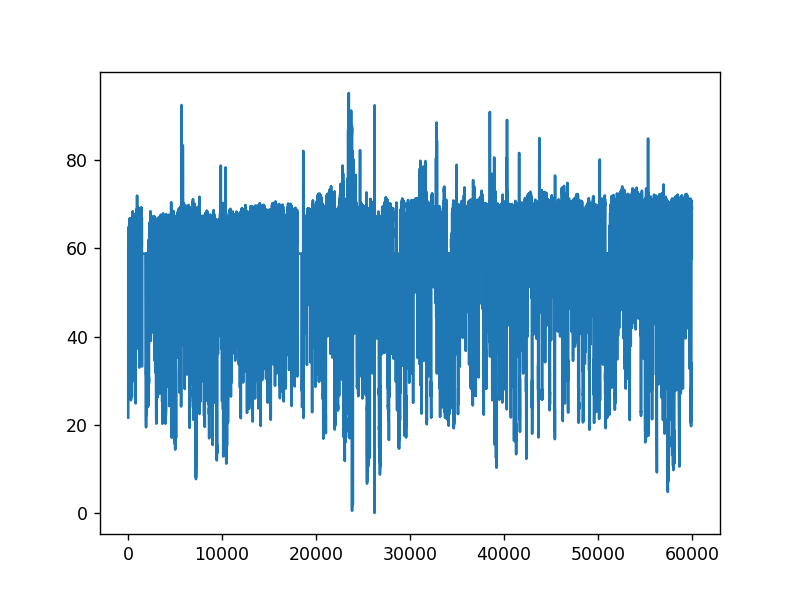

In [37]:
#plot cleaned data to verify data cleaning exercise above has not trimmed data excessively.
plt.figure()
plt.plot(list(df['346TT035/PV.V']))
#can still see some outliers, obvious data could be trimmed more, will leave some buffer.

In [38]:
# after cleaning the '346TT035/PV.V' column of outlier values
# recalculate the 10/50/90 percentiles.

print ("10th percentile ", "{:.2f}".format(df['346TT035/PV.V'].quantile(q=0.1)) )
print ("50th percentile ", "{:.2f}".format(df['346TT035/PV.V'].quantile(q=0.5)) )
print ("90th percentile ", "{:.2f}".format(df['346TT035/PV.V'].quantile(q=0.9)) )

#values pre-cleaning
#10th percentile  30.45
#50th percentile  65.58
#90th percentile  70.24
#not a large change, evidence the cleaning has reasonably removed outliers without affecting distribution.

10th percentile  30.98
50th percentile  65.17
90th percentile  70.05


f. Replace all outliers in all columns in PD1/2 with the placeholder for missing values. (Hint: if your outlier detection technique is too aggressive you may end up removing some sensors in step 2a that you will require later on)

In [42]:
#assess general status of other columns. 
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html
#count number of non NAN values, if data is perfect will be same as df.shape[0] (60,000)
dfCount = df.count()
#print (type(dfCount))
print (dfCount.head())
print ("---------dfCount.describe()----------")
print (dfCount.describe())
print (dfCount.shape)

Utilities_Shutdown/USD1.Q               59997
ACP:P:C2$T$Control/322-PSL-100_DB.Q     59993
mould_matte_SiO2                        59990
PrcCtl_Coal/Rd_Coal_PV1.V               59742
AS01_DATA_FROM_AS05/377-PIT-002_Lo.Q    59747
dtype: int64
---------dfCount.describe()----------
count      792.000000
mean     44393.493687
std      21352.176122
min          0.000000
25%      34118.000000
50%      59746.500000
75%      59979.000000
max      60000.000000
dtype: float64
(792,)


In [44]:
dftypes = df.dtypes
dfColTypes = []
for x in range(0, dftypes.shape[0]):
    dfColTypes.append(dftypes[x].name)
    if dftypes[x].name != 'float64':
        print ("dtype ", dftypes[x], "column ", x, " colname = ", dfColNames[x])
#print (dfColTypes)
#print (len(dfColTypes))
#NB: all other columns have type float64

dtype  object column  50  colname =  534ET175/PV.QBAD
dtype  int64 column  61  colname =  AS05_PLC_COMMS/AS5-AS1commsOK.Q
dtype  int64 column  104  colname =  322-VT-001B/PV.QBAD
dtype  int64 column  136  colname =  AS01_DATA_TO_AS14/PltAvl.Q
dtype  int64 column  190  colname =  635LIT255/PV.V
dtype  int64 column  207  colname =  slag_bath_Total
dtype  object column  208  colname =  ACP:P:C2$Matte$Tap$2/322-HS-608_DB.Q
dtype  object column  212  colname =  AS01-ScanTime/OB82T2.V
dtype  object column  258  colname =  ACP:P:C2$T$Control/LaMvX_DB.PV_TipMv
dtype  object column  393  colname =  322-ZT-106/PV.QBAD
dtype  object column  440  colname =  mould_matte_Fe
dtype  int64 column  525  colname =  Process_Shutdown/PSD14.Q
dtype  int64 column  601  colname =  534TT410/PV.V
dtype  int64 column  635  colname =  Process_Shutdown/PSD3.Q
dtype  int64 column  638  colname =  322-FIC-001/322-FIC-001.SP
dtype  int64 column  660  colname =  TSP/TRPSP.PIncr
dtype  object column  790  colname =  34

In [41]:
#list columns with non NAN values less than df.shape[0]. ie: one or more NAN values.
dfCount[dfCount.abs() < 60000]

Utilities_Shutdown/USD1.Q                     59997
ACP:P:C2$T$Control/322-PSL-100_DB.Q           59993
mould_matte_SiO2                              59990
PrcCtl_Coal/Rd_Coal_PV1.V                     59742
AS01_DATA_FROM_AS05/377-PIT-002_Lo.Q          59747
322-PIT-008/PV.V                               8999
322-FIC-004/322-FIC-004.PV_IN                  8999
SmTotals/321-WQ-033SvS.V                       8999
322-PIT-111/PV.QBAD                            8999
ACP:P:C2$Matte$Tap$2/322-HS-628_DB.Q          59747
322-VT-011B/PV.V                               8999
322-PIT-105/PV.V                              59977
534FIT504/PV2.V                               59741
AS14_Data_AS01/PV7.V                          59978
ACP:P:C2$Slag$Tap/322-HS-718_DB.Q             59735
635FIT256/PV.QBAD                             59746
635FIT231/PV.V                                59979
PrcCtl_Modes/SdQ.Q                             8953
534AIT452/PV_BO2.V                            34215
Process_Shut

In [46]:
#dfColNames
#dfColTypes
df.shape

(60000, 792)

In [61]:
#loop through all columns
cols22Delete = []
for i in range(df.shape[1]):
    #exclude columns already treated.
    #count number of NAN's and replace with mean value.
    if dfColTypes[i]=="float64":
        if (df.shape[0] - df[dfColNames[i]].count())>50000:
            print ("# of NAN's:", df.shape[0] - df[dfColNames[i]].count(), ", mean=", df[dfColNames[i]].mean(), ", colName =",dfColNames[i] )
            cols22Delete.append(dfColNames[i])
    #examine std dev, trim outliers until std 
print (cols22Delete)
print ("# of columns with > 50,000 null values =", len(cols22Delete))
#NB: these columns are 5/6 null values, filling in missing values as per instructions degrades the data. 


# of NAN's: 51001 , mean= 0.000777864207134126 , colName = 322-PIT-008/PV.V
# of NAN's: 51001 , mean= 0.6036226247360817 , colName = 322-FIC-004/322-FIC-004.PV_IN
# of NAN's: 51001 , mean= 0.9986665185020558 , colName = SmTotals/321-WQ-033SvS.V
# of NAN's: 51001 , mean= 0.9986665185020558 , colName = 322-PIT-111/PV.QBAD
# of NAN's: 51001 , mean= 0.003000333370374486 , colName = 322-VT-011B/PV.V
# of NAN's: 51047 , mean= 0.12174690048028594 , colName = PrcCtl_Modes/SdQ.Q
# of NAN's: 60000 , mean= nan , colName = PrcCtl_THeight/LaHt.V
# of NAN's: 60000 , mean= nan , colName = AS02_DATA_FROM_PLC021/LaTipMvX.V
# of NAN's: 51047 , mean= 0.05953311739081872 , colName = PrcCtl_Shroud/ShArOxCtl.ShArISP
# of NAN's: 51047 , mean= 0.8819390148553558 , colName = Cooling_Shutdown/Allow$Reset.Q
# of NAN's: 51047 , mean= 0.2706355411593879 , colName = SmTotals/321-FQ-031S.V
# of NAN's: 51047 , mean= 0.0016754160616553112 , colName = SmTotals/SmFcOxQ.V
# of NAN's: 51047 , mean= 0.20272534346029264 , c

# of NAN's: 50990 , mean= 0.08845726970033296 , colName = Utilities_Shutdown/USD20.Q
# of NAN's: 50986 , mean= 0.059019303305968496 , colName = ACP:P:C2$T$Control/LaMvY_DB.PV_Angle
# of NAN's: 50986 , mean= 0.011215988648768646 , colName = 635FIT255/PV.V
# of NAN's: 60000 , mean= nan , colName = AS14_Data_AS01/DIG3.Q
# of NAN's: 50986 , mean= 0.0008875083203905037 , colName = PrcCtl_MatteC/APCMatteFeedMax.V
# of NAN's: 60000 , mean= nan , colName = ACP:P:C2$Matte$Tap$1/322-HS-506_DB.Q
# of NAN's: 60000 , mean= nan , colName = 322-TT-008/PV.V
# of NAN's: 51048 , mean= 0.009941912421805183 , colName = 322-PIC-203/322-PIC-203.PV_IN
# of NAN's: 51014 , mean= 0.1273091475628756 , colName = 322-ZM-001/VSD.IntSpdSP
# of NAN's: 51014 , mean= 0.07010905853549966 , colName = 537TT001/PV.V
# of NAN's: 51014 , mean= 0.009459158691297574 , colName = ACP:P:C2$Slag$Tap/322-HS-729_DB.Q
# of NAN's: 51014 , mean= -1174.338116180857 , colName = 322-PIT-003/PV.V
# of NAN's: 51014 , mean= 121.6269122235095

In [50]:
#df.plot.box()
#needs clean data o-wise errors

In [63]:
start_time = timeit.default_timer()
for i in range(df.shape[1]):
    #exclude columns already treated.
    #count number of NAN's and replace with mean value.
    if dfColTypes[i]=="float64":
        print ("# of NAN's:", df.shape[0] - df[dfColNames[i]].count(), ", mean=", df[dfColNames[i]].mean(), ", colName =",dfColNames[i] )
        df[dfColNames[i]].fillna(df.mean())
    #examine std dev, trim outliers until std 
elapsed = timeit.default_timer() - start_time
print ("elapsed time : ", elapsed)

# of NAN's: 3 , mean= 4122.31238575921 , colName = Utilities_Shutdown/USD1.Q
# of NAN's: 7 , mean= 3292.2937359439943 , colName = ACP:P:C2$T$Control/322-PSL-100_DB.Q
# of NAN's: 10 , mean= 0.9968994832472079 , colName = mould_matte_SiO2
# of NAN's: 258 , mean= 26.20712781893368 , colName = PrcCtl_Coal/Rd_Coal_PV1.V
# of NAN's: 253 , mean= 48.81695981308213 , colName = AS01_DATA_FROM_AS05/377-PIT-002_Lo.Q
# of NAN's: 51001 , mean= 0.000777864207134126 , colName = 322-PIT-008/PV.V
# of NAN's: 51001 , mean= 0.6036226247360817 , colName = 322-FIC-004/322-FIC-004.PV_IN
# of NAN's: 51001 , mean= 0.9986665185020558 , colName = SmTotals/321-WQ-033SvS.V
# of NAN's: 51001 , mean= 0.9986665185020558 , colName = 322-PIT-111/PV.QBAD
# of NAN's: 253 , mean= 45.778124158333846 , colName = ACP:P:C2$Matte$Tap$2/322-HS-628_DB.Q
# of NAN's: 51001 , mean= 0.003000333370374486 , colName = 322-VT-011B/PV.V
# of NAN's: 23 , mean= 0.8766527168748021 , colName = 322-PIT-105/PV.V
# of NAN's: 259 , mean= 0.01056

# of NAN's: 16 , mean= 0.11358028807682048 , colName = 635IT296/PV.V
# of NAN's: 23 , mean= 0.035130133217733464 , colName = TPositioning/DTAG10.Q
# of NAN's: 23 , mean= 0.03568034413191724 , colName = 534TT410/PV.QBAD
# of NAN's: 23 , mean= 0.03521349850776131 , colName = 346AIT001/PV.V
# of NAN's: 23 , mean= 0.033729596345265685 , colName = 322-PIT-004/PV.V
# of NAN's: 21 , mean= 0.005902065723003051 , colName = AS01_DATA_FROM_AS05/FcArPV.V
# of NAN's: 1873 , mean= 0.11063705334870198 , colName = PrcCtl_Matte/AP_OverTemp.Q
# of NAN's: 1873 , mean= 0.36979372752765494 , colName = ACP:P:C2$Matte$Tap$1/322-HS-513_DB.Q
# of NAN's: 51047 , mean= 0.2706355411593879 , colName = SmTotals/321-FQ-031S.V
# of NAN's: 51047 , mean= 0.0016754160616553112 , colName = SmTotals/SmFcOxQ.V
# of NAN's: 51047 , mean= 0.20272534346029264 , colName = AS05_DATA_TO_AS01/MtPV_Tt.V
# of NAN's: 51047 , mean= 0.2276331955769016 , colName = AS01_DATA_TO_AS05/MtAirStp.Q
# of NAN's: 9728 , mean= 0.09683322724379376

# of NAN's: 22 , mean= 433.7377633858921 , colName = 322-VT-011A/PV.QBAD
# of NAN's: 17 , mean= 12380.937934021948 , colName = AS01_DATA_FROM_AS05/SiRun.Q
# of NAN's: 51047 , mean= 211.28606331602543 , colName = PrcCtl_Silica/SiCtl.SmSiSrLSP
# of NAN's: 16 , mean= 34903.68956663732 , colName = AS01-ScanTime/OB35T2.V
# of NAN's: 41 , mean= 12674.032935872345 , colName = 322-VT-001F/PV.QBAD
# of NAN's: 37 , mean= 1.3191473279062456 , colName = AS01-ScanTime/OB1T2.V
# of NAN's: 1869 , mean= 21132.323770133804 , colName = SmTotals/322-FQ-003S.V
# of NAN's: 51048 , mean= 0.0011170688114387846 , colName = PrcCtl_Coal/ReductionCount.V
# of NAN's: 21 , mean= 3975.650630514741 , colName = AS05_DATA_FROM_AS01/MattPermitives.Q
# of NAN's: 51048 , mean= 0.6243297587131368 , colName = 534AIT453/PV_SO2.V
# of NAN's: 26 , mean= 11834.870328841927 , colName = Cooling_Shutdown/CSD3.Q
# of NAN's: 21 , mean= 3066.4503884736164 , colName = PrcCtl_Coal/FcCtl.FcISP
# of NAN's: 21 , mean= 9543.985243271769 ,

# of NAN's: 51013 , mean= 0.7062423500611995 , colName = PrcTotals/322-FQ-004.V
# of NAN's: 51013 , mean= 0.020251474351841547 , colName = 534PIT133/PV.V
# of NAN's: 81 , mean= 353.91766007136306 , colName = 635TT236/PV.V
# of NAN's: 103 , mean= 295.1493984985629 , colName = 534FIT330/PV.V
# of NAN's: 97 , mean= 110.90321668865002 , colName = 635TT230/PV.V
# of NAN's: 100 , mean= 210.32842734222442 , colName = 534FIT504/PV.V
# of NAN's: 103 , mean= 199.32292537841542 , colName = AS05_DATA_FROM_AS01/TotLaArPV.V
# of NAN's: 51000 , mean= 0.0012222222222222222 , colName = SmTotals/321-WQ-024SvS.V
# of NAN's: 5849 , mean= 33769.25846848429 , colName = Utilities_Shutdown/USD21.Q
# of NAN's: 51097 , mean= 0.2831629787712007 , colName = 537TT015/PV.QBAD
# of NAN's: 275 , mean= 280.9557635066082 , colName = Process_Shutdown/PSD16.Q
# of NAN's: 51039 , mean= 867.9664038539453 , colName = AS01-ScanTime/cuOB30.V
# of NAN's: 5773 , mean= 449.0347243834668 , colName = AS01_DATA_FROM_AS14/AcidPlantP

# of NAN's: 25788 , mean= 0.33502864491991113 , colName = 534TT334/PV.V
# of NAN's: 25788 , mean= 0.005641295451888227 , colName = AS05_DATA_TO_AS01/FI-9501.V
# of NAN's: 25788 , mean= 0.005670524962001637 , colName = AS01-ScanTime/cuOB33.V
# of NAN's: 25788 , mean= 0.0073658365485794455 , colName = 322-ZT-106/PV.V
# of NAN's: 25788 , mean= 0.9997953934292061 , colName = AS01_DATA_TO_AS05/MtAirStt.Q
# of NAN's: 25788 , mean= 0.983689933356717 , colName = PrcCtl_PGM_Recycle/PgrArPV.V
# of NAN's: 25788 , mean= 0.0005553606921547995 , colName = SmTotals/SmOxSVQ.V
# of NAN's: 25790 , mean= 0.42160187079801226 , colName = AS01_DATA_FROM_AS05/LcPV.V
# of NAN's: 25790 , mean= 0.7138848289973692 , colName = Cooling_Shutdown/CoolSImm.Q
# of NAN's: 25790 , mean= 0.21251096170710318 , colName = 322-PIT-112/PV.QBAD
# of NAN's: 25790 , mean= 0.14454837766734874 , colName = AS01_DATA_TO_AS05/MtFdStt.Q
# of NAN's: 25790 , mean= 0.010260157848582287 , colName = 322-FYT-004/Total$Air.V
# of NAN's: 2579

# of NAN's: 2 , mean= 27.80916198688289 , colName = 537TT015/PV.V
# of NAN's: 17 , mean= 0.5914175683110214 , colName = 346IT076/PV.V
# of NAN's: 51047 , mean= 0.02714174019881604 , colName = SmTotals/321-WQ-024S.V
# of NAN's: 51047 , mean= 0.16407907963811014 , colName = 534TT392/PV.V
# of NAN's: 37294 , mean= 0.6709856425614373 , colName = Process_Shutdown/PSD1.Q
# of NAN's: 20 , mean= 0.0018172724241413804 , colName = 322-FIT-103/PV.V
# of NAN's: 23 , mean= 0.0027343815129132836 , colName = 322TTstMode/LnceEntryAvail.Q
# of NAN's: 21 , mean= 0.016222344487237198 , colName = ACP:P:C2$Slag$Tap/322-HS-717_DB.Q
# of NAN's: 23 , mean= 0.01085416076162529 , colName = AS01_DATA_FROM_AS05/377-PIT-002_LoLo.Q
# of NAN's: 23 , mean= 0.005935608649982493 , colName = AS05_DATA_TO_AS01/FI-7820.V
# of NAN's: 20 , mean= 0.021373791263754584 , colName = TSP/TRPSP.SmTrkF
# of NAN's: 23 , mean= 0.0006169031462060457 , colName = Purging/FC_PurgeActGUI.Q
# of NAN's: 16 , mean= 0.010586156308348893 , col

# of NAN's: 51014 , mean= -1174.338116180857 , colName = 322-PIT-003/PV.V
# of NAN's: 51014 , mean= 121.62691222350952 , colName = Cooling_Shutdown/CSD22.Q
# of NAN's: 51014 , mean= 15653.439839749944 , colName = 534AIT453/PV_BSO2.V
# of NAN's: 51014 , mean= 250.81502093329 , colName = 322-FV-001/2.MV
# of NAN's: 51014 , mean= 0.008123748052526152 , colName = TPositioning/DTAG8.Q
# of NAN's: 1874 , mean= 5558.650369315291 , colName = slag_bath_CaO
# of NAN's: 1869 , mean= 21132.13406751435 , colName = AS02_DATA_TO_AS01/Hearth$fan.Q
# of NAN's: 51047 , mean= 5084.776994258904 , colName = ACP:P:TSP/TRPSP.PSpSB
# of NAN's: 14 , mean= 13.987930517120661 , colName = PrcCtl_Matte/ManMattChg.Q
# of NAN's: 51047 , mean= 0.39115380319445997 , colName = TMovement/CheckSplash.Q
# of NAN's: 2 , mean= 1.039973331086452 , colName = PrcCtl_TGas/LaArOxCtl.MtTtPV
# of NAN's: 51047 , mean= 1.522070814252057 , colName = 322-PIT-203/PV.QBAD
# of NAN's: 51047 , mean= 381.95074276778735 , colName = AS01-Sca

# of NAN's: 208 , mean= 27.042757704640685 , colName = AS05_PLC_COMMS/AS5-AS11datarec.Q
# of NAN's: 125 , mean= 28.37398377924205 , colName = ACP:P:C2$Matte$Tap$1/322-HS-518_DB.Q
# of NAN's: 141 , mean= 77.03996688478684 , colName = 322-PIT-101/PV.QBAD
# of NAN's: 542 , mean= 119.77438474203024 , colName = 322-VT-001D/PV.V
# of NAN's: 51010 , mean= 0.005116796440489433 , colName = ACP:P:C2$Slag$Tap/322-HS-707_DB.Q
# of NAN's: 51094 , mean= 0.004154502582528632 , colName = 534AIT452/4.Q
# of NAN's: 38 , mean= 19.788687218346862 , colName = AS14_Data_AS01/DIG8.Q
# of NAN's: 1598 , mean= 78.00016899315705 , colName = AS01_DATA_FROM_AS14/APRdyStt.Q
# of NAN's: 300 , mean= 239.80041467999237 , colName = 635FIT211/PV.V
# of NAN's: 225 , mean= 405.8049905118823 , colName = 322TPositioning/T$Positions1.Pos_PV
# of NAN's: 51010 , mean= 23.296013808080392 , colName = 537TT004/PV.V
# of NAN's: 336 , mean= 391.2010093687699 , colName = 346FIT057/PV.V
# of NAN's: 219 , mean= 390.9152816638187 , col

In [66]:
13775/60/60
#elapsed time :  13775.23 = approx 4 hrs.

3.826388888888889

In [68]:
import pickle
start_time = timeit.default_timer()
pickle.dump(df, open( "hatch_1_save.p", "wb" ) )
elapsed = timeit.default_timer() - start_time
print ("elapsed time : ", elapsed)

elapsed time :  4.4187839509686455


In [71]:
#list files in directory.
files = [f for f in os.listdir('.') if os.path.isfile(f)]
print (type(files))
for f in files:
    print (f)

<class 'list'>
Hatch DS test questions.pdf
Hatch_1.ipynb
hatch_1_save.p
Hatch_2.ipynb
OD.csv
PD1.csv
PD2.csv
setup_notes.txt.txt
